# COMP377: AI for Software Developers
## Assignment 3: Multi-layer Neural Network
### Exercise 1

Name: Wenjie Zhou

Student ID: 301337168

Date: November 5, 2024

File Name: WenjieZhou_COMP377Lab3_Ex1

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random

### Part 1: Data Loading

In [2]:
## Part 1: Data Loading ##

# Load the data from the UCI repository
student_performance = fetch_ucirepo(id=320)

# Assign the features and target to X and y
X = student_performance.data.features
y = student_performance.data.targets['G3']

# Convert G3 (final grade) into a binary outcome (pass/fail) assuming passing grade >= 10
y = (y >= 10).astype(int)

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Part 2: Data Preprocessing

In [3]:
## Part 2: Data Pre-processing ##

# Split the data by 80/20 rule due to the small size of the dataset (649 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify the categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create a preprocessor object to scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessor to both training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the number of features after preprocessing
input_shape = X_train_preprocessed.shape[1]

### Part 3: Create and Train Model

In [4]:
## Part 3: Model Training ###

# Define MLP Model with 1 hidden layer and 32 neurons (small dataset)
# Select dropout rate of 0.3 to prevent overfitting
# Select the sigmoid activation function for the hidden layer and the output layer
def create_mlp_model(input_shape):
    model = Sequential([
        Dense(32, activation='sigmoid', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the Model with the input shape
mlp_model = create_mlp_model(input_shape)

# Train the model and capture the training history
# Select batch size of 16 and 50 epochs (small dataset)
history = mlp_model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4415 - loss: 0.7589 - val_accuracy: 0.8750 - val_loss: 0.5131
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.5235 - val_accuracy: 0.8750 - val_loss: 0.4085
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8399 - loss: 0.4369 - val_accuracy: 0.8750 - val_loss: 0.3774
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8344 - loss: 0.4269 - val_accuracy: 0.8750 - val_loss: 0.3634
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8428 - loss: 0.4153 - val_accuracy: 0.8750 - val_loss: 0.3547
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 0.4153 - val_accuracy: 0.8750 - val_loss: 0.3480
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.3818 - val_accuracy: 0.8750 - val_loss: 0.3427
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - loss: 0.3836 - val_accuracy: 0.8750 - val_loss: 0.3378
Epo

### Part 4: Test Model

In [5]:
### Part 4: Model Evaluation ###

# Make predictions on the test set
y_pred = (mlp_model.predict(X_test_preprocessed) > 0.5).astype("int32")
y_pred_proba = mlp_model.predict(X_test_preprocessed)

# Prompt the user to enter new data for prediction
# To simplify the process of 30 features, ask the user to enter all values at once
def predict_new_data(model, preprocessor):
    input_string = input("Enter values for each feature separated by spaces:\n"
                         "(school sex age address famsize Pstatus Medu Fedu Mjob Fjob reason guardian "
                         "traveltime studytime failures schoolsup famsup paid activities nursery higher "
                         "internet romantic famrel freetime goout Dalc Walc health absences)\n> ")

    input_values = input_string.split()

    # Check if the user provided the correct number of values
    if len(input_values) != len(X.columns):
        print(f"Error: Expected {len(X.columns)} values, but got {len(input_values)}.")
        return

    # Convert and preprocess the input values
    new_data = {column: [value] for column, value in zip(X.columns, input_values)}
    new_data_df = pd.DataFrame(new_data)
    new_data_preprocessed = preprocessor.transform(new_data_df)

    # Make predictions on the new data
    prediction_proba = model.predict(new_data_preprocessed)[0][0]
    prediction = (prediction_proba > 0.5).astype(int)
    
    # Display the prediction result
    result = "Pass" if prediction == 1 else "Fail"
    print(f"Prediction: {result} (Probability: {prediction_proba:.2f})")

# Call the function to predict user data
predict_new_data(mlp_model, preprocessor)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: Pass (Probability: 0.92)


### Part 5: Calculate Accuracy & Accuracy

In [6]:
### Part 5: Model Accuracy ###

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.91
Precision: 0.92
Recall: 0.98
F1 Score: 0.95
ROC AUC: 0.80


### Visualization and Display (Optional)

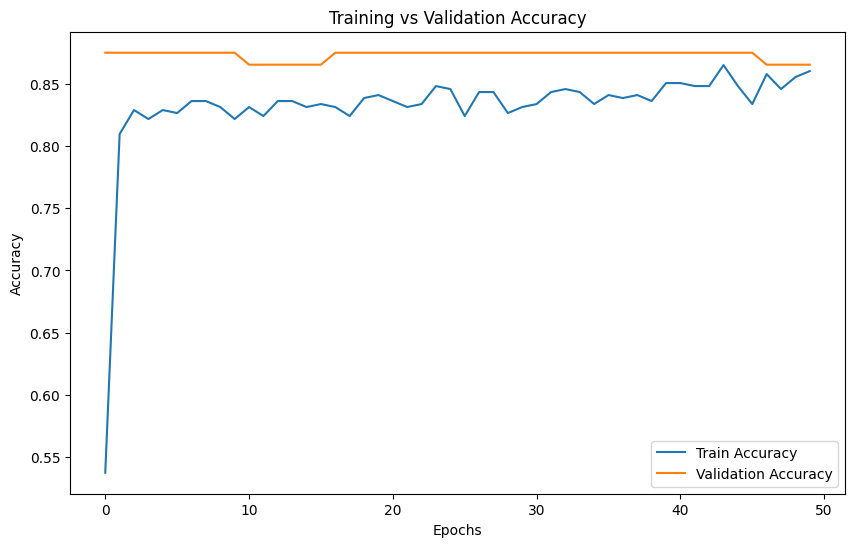

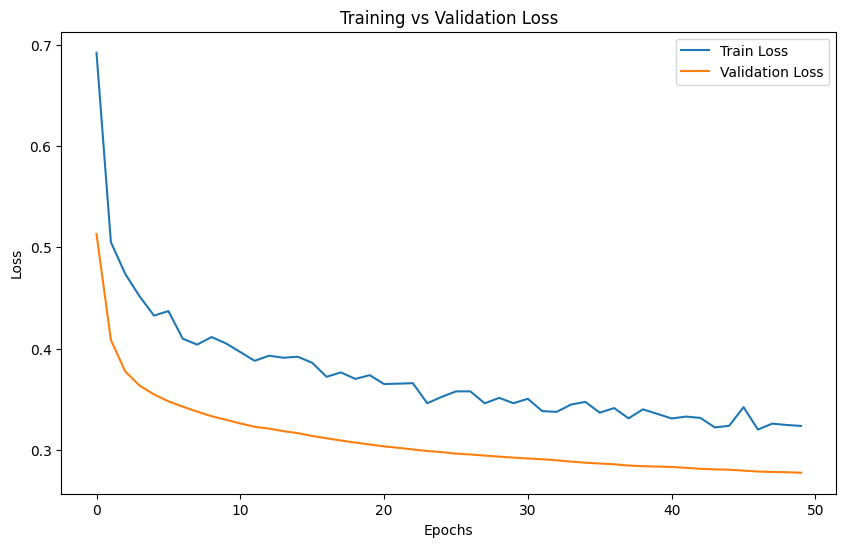

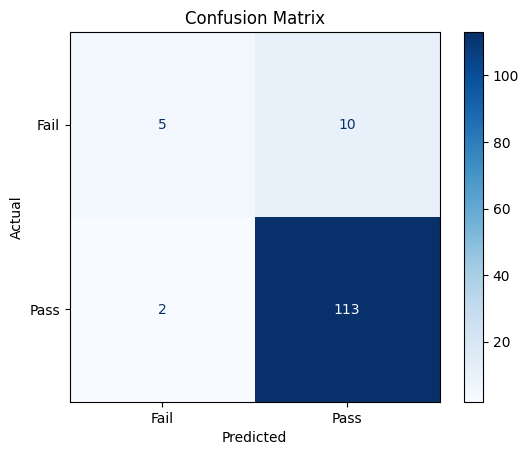

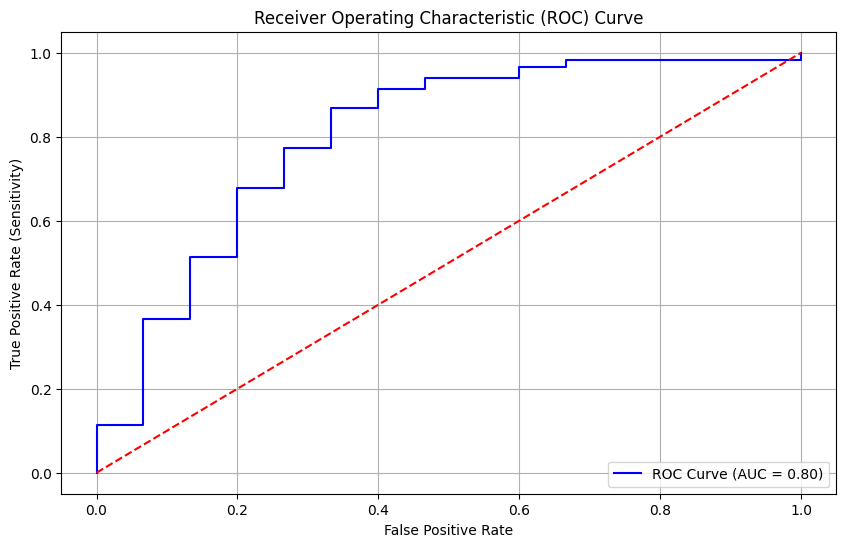

In [7]:
### Visualization & Display ###

## Print Results to the Screen ###

# Learning Curves
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix
# Display performance of the model in terms of true positives, false positives, true negatives, and false negatives.
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
# Plot the Receiver Operating Characteristic (ROC) curve to visualize the trade-off between true positive rate and false positive rate.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Summary and Conclusions

New Data
- GP M 15 U LE3 T 4 4 other other reputation mother 1 2 1 yes yes yes yes yes yes yes no 4 3 3 1 1 4 5
- Prediction: Pass (Probability: 0.92)

MLP
- Accuracy: 0.91
- Precision: 0.92
- Recall: 0.98
- F1 Score: 0.95
- ROC AUC: 0.80

Given the small dataset size of 649 instances, the model was designed with a single hidden layer of 32 neurons, using a sigmoid activation function and a batch size of 16, which was found to yield better performance based on multiple testing runs.

The MLP model achieves strong performance across key metrics, including high accuracy, precision, recall, and F1 score, indicating effective classification, particularly in identifying students likely to pass. However, while the ROC AUC score is solid, it suggests that the model could be further refined to enhance its ability to differentiate between "Pass" and "Fail" cases more accurately. Overall, these results are promising, especially considering the small dataset size and the model's simplicity.

To further improve performance, potential steps include additional feature engineering to capture interactions between features, experimenting with a deeper network architecture or increasing the number of neurons in the current layer, and applying regularization techniques like L2 regularization or increasing dropout rates to prevent overfitting. Given the limited data, trying alternative models such as Random Forest or Gradient Boosting, generating synthetic data, and performing extensive hyperparameter tuning could also help. These adjustments may collectively improve the model’s predictive power and its robustness in generalizing to new data.